In [3]:
import sys
from scipy.stats import pearsonr
import numpy as np
import math

import matplotlib as mpl
import matplotlib.backends.backend_pdf as backpdf
from  matplotlib import pyplot as plt
import pylab

import ROOT
from ROOT import TChain, TSelector, TTree
from ROOT import TCanvas, TPad, TFile, TPaveText
from ROOT import gBenchmark, gStyle, gROOT

# These imports disable display for some reason
#from IPython.display import Image
#from IPython.display import display

# https://root.cern.ch/doc/master/group__tutorial__pyroot.html
# https://nbviewer.org/url/root.cern/doc/master/notebooks/ntuple1.py.nbconvert.ipynb
#rdf = ROOT.RDataFrame("Events", "step3_inNANOEDMAODSIM_1.root");

These libraries are necessary now or in the future, so make sure to pip install anything that's missing

I recommed running on one file at a time, at least initially, since it will take longer to make plots if you load all the nano files. Once you have something in mind that you want to confirm, you can load all the files for more statistics.

In [4]:
# Opening one root file: You only have one file now, so run this
file = ROOT.TFile("DeepCore_nano_1.root") # file name 
file.ls()
tree = file.Get("Events") # Tree name 

N = tree.GetEntries() # Number of events/observations
print("Number of events:",N)
#tree.Print() # Prints all the branches/variables, not very useful since you can't Ctrl F and search it

Number of events: 42900
TFile**		DeepCore_nano_1.root	
 TFile*		DeepCore_nano_1.root	
  KEY: TObjString	tag;1	Collectable string class
  KEY: TTree	Events;1	Events
  KEY: TTree	LuminosityBlocks;1	LuminosityBlocks
  KEY: TTree	Runs;1	Runs
  KEY: TTree	MetaData;1	Job metadata
  KEY: TTree	ParameterSets;1	Parameter sets


Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


In [5]:
# Opening many root files: 
root_files = open("DeepCore_nano_list.txt", "r") # txt list that contains list of files seperate by the <ENTER> character
tree = TChain("Events") # tree name

for line in root_files: # reading file names and adding them 
    print("Adding file: " + line)
    tree.Add(line[:-1])

N = tree.GetEntries() # total number of events/observations
print("Number of events:",N)
#t.Print()


Adding file: DeepCore_nano_1.root

Adding file: DeepCore_nano_2.root

Number of events: 80900


Instead of Printing branches here, it's better to dump the branches in a text file from the command line and search variables using Vim (or your favorite text editor):
- root -b DeepCore_nano_1.root
- .> DeepCore_nano_branches.txt
- Events ->Print()
- .>
- .q 

In [7]:
# Template to extract the variables you need to plot. I included a few examples and you can use them to extract other variables

gen_jet_eta = [] #GEN is the truth information, which in this case means the pt/eta/phi of the simulated jet
gen_jet_pt = []
gen_jet_phi = []

jet_eta = [] # This is RECO information, which in this case means the pt/eta/phi of the reconstructed jet in the detector
jet_pt = []
jet_phi =  []

PV_z = [] # Reco Primary Vertex z coordinate
PV_n = [] # Number of Reco Primary Vertex

a = 0
N = tree.GetEntries()
print(N)

for event in tree:
    PV_n.append(event.PV_npvs)
    PV_z.append(event.PV_z)
    for i in range(event.nGenJet):
        gen_jet_eta.append(event.GenJet_eta[i])
        gen_jet_pt.append(event.GenJet_pt[i])
        gen_jet_phi.append(event.GenJet_phi[i])
    for i in range(event.nJet):
        jet_eta.append(event.Jet_eta[i])
        jet_pt.append(event.Jet_pt[i])
        jet_phi.append(event.Jet_phi[i])
    # Since it may take a while to run, a statement like this is useful to evaluate run time
    a= a+1
    if (a%10000 ==0):
        print(a)


80900
10000
20000
30000
40000
50000
60000
70000
80000


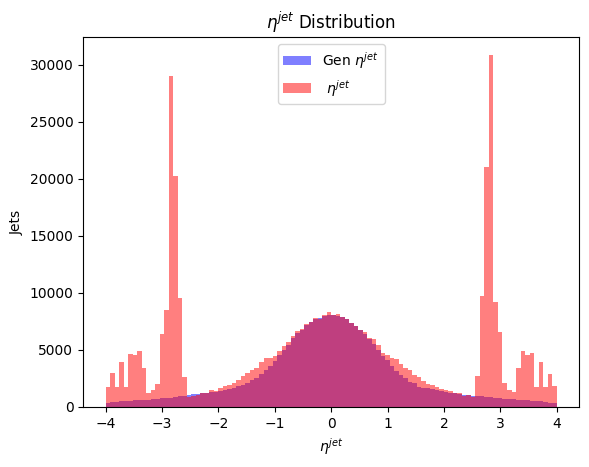

In [4]:
# Template for plotting 2 overlaid variables (eta) 
bin_size = 100
plt.hist(gen_jet_eta, color = 'b', alpha = 0.5, label = 'Gen $\eta^{jet}$ ', range = (-4,4), bins = bin_size)
plt.hist(jet_eta, color = 'r', alpha = 0.5, label = ' $\eta^{jet}$ ', range = (-4,4), bins = bin_size)
plt.legend(loc='best')
plt.xlabel('$\eta^{jet}$')
plt.ylabel('Jets')
plt.title('$\eta^{jet}$ Distribution')
plt.show()


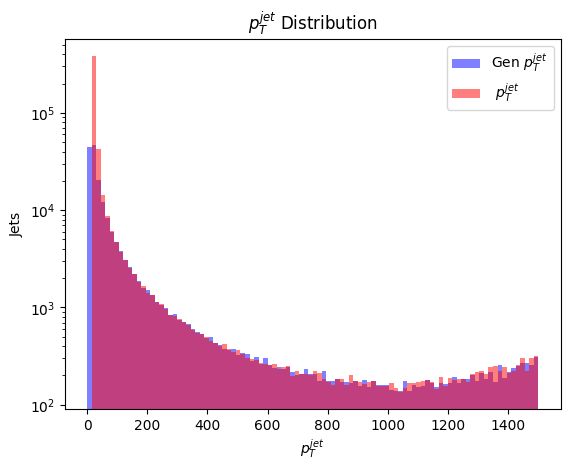

In [5]:
# Plotting pt
bin_size = 100
plt.hist(gen_jet_pt, color = 'b', alpha = 0.5, label = 'Gen $p_T^{jet}$ ', range = (0,1500), bins = bin_size)
plt.hist(jet_pt, color = 'r', alpha = 0.5, label = ' $p_T^{jet}$ ', range = (0,1500), bins = bin_size)
plt.legend(loc='best')
plt.xlabel('$p_T^{jet}$')
plt.ylabel('Jets')
plt.title('$p_T^{jet}$ Distribution')
plt.yscale('log')
plt.show()

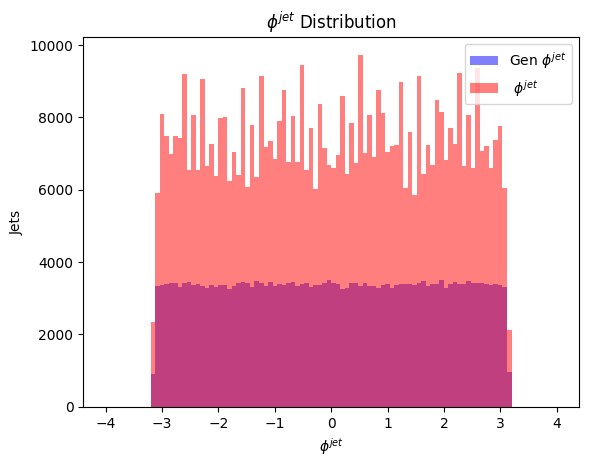

In [6]:
# Plotting phi
bin_size = 100
plt.hist(gen_jet_phi, color = 'b', alpha = 0.5, label = 'Gen $\phi^{jet}$ ', range = (-4,4), bins = bin_size)
plt.hist(jet_phi, color = 'r', alpha = 0.5, label = ' $\phi^{jet}$ ', range = (-4,4), bins = bin_size)
plt.legend(loc='best')
plt.xlabel('$\phi^{jet}$')
plt.ylabel('Jets')
plt.title('$\phi^{jet}$ Distribution')
plt.show()

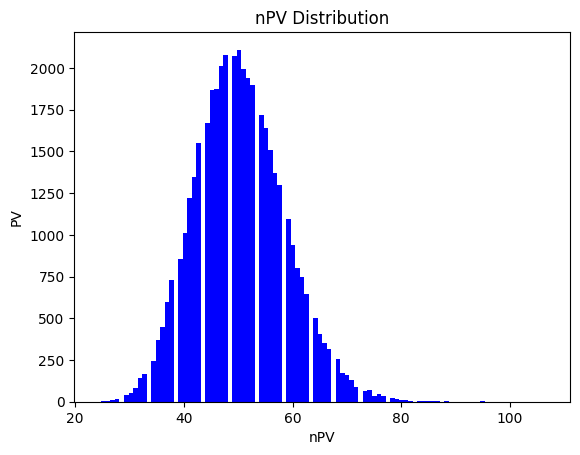

In [7]:
# Plotting single variable
bin_size = 100
plt.hist(PV_n, color = 'b', bins = bin_size)
plt.xlabel('nPV')
plt.ylabel('PV')
plt.title('nPV Distribution')
plt.show()

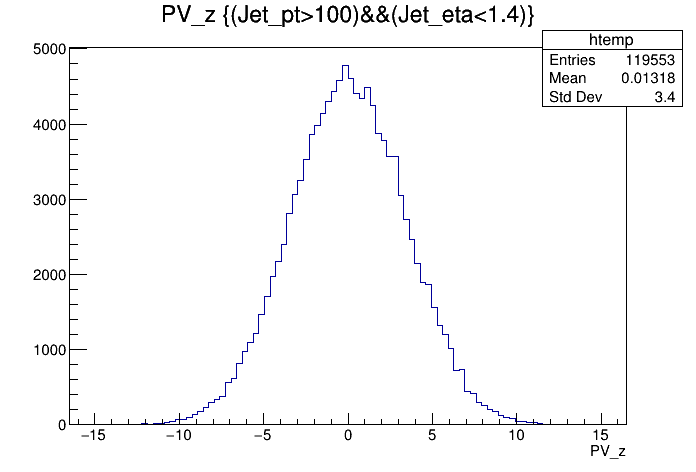

Info in <TCanvas::Print>: png file hist.png has been created


In [11]:
# Plotttng a variable directly, without extracting it (faster), PV_z for example
# You'll need these imports too, but be careful sometimes they prevent the display of ther previous plots 
from IPython.display import Image
from IPython.display import display

#t.Draw("Jet_eta", "(Jet_pt>100)&&(Jet_eta<1.4)") # note tha
tree.Draw("PV_z","(Jet_pt>100)&&(Jet_eta<1.4)") # I also included some cuts for fun
ROOT.gPad.SaveAs("hist.png") #pdf
display(Image("hist.png"))

In [31]:
# Your first assignment is to plot PVz and nPV and customize the pyRoot plots (adding axis labels, legend..etc). 

canvas = ROOT.TCanvas("canvas", "PVz and nPV", 800, 600)
canvas.Divide(2,1)

pvz_hist = ROOT.TH1F("pvz_hist", "PVz Histogram;PVz;Frequency", 100, -25, 25)
npv_hist = ROOT.TH1F("npv_hist", "nPV Histogram;nPV;Frequency", 100, 10, 100)

print(tree.GetEntries())
for i,event in enumerate(tree):
    pvz_hist.Fill(event.PV_z)
    npv_hist.Fill(event.PV_npvs)
    if i%5000==0:
        print(i)

pvz_hist.SetLineStyle(1)     
pvz_hist.SetMarkerStyle(20)
pvz_hist.SetFillColor(ROOT.kBlue)

npv_hist.SetLineStyle(3)  
npv_hist.SetMarkerStyle(10)
npv_hist.SetFillColor(ROOT.kRed)

canvas.cd(1)
pvz_hist.Draw()
legend1 = ROOT.TLegend(600/800, 200/600, 780/800, 400/600)
legend1.AddEntry(pvz_hist, "Primary Vertex Data", "L")
legend1.SetTextFont(42)
legend1.SetTextSize(0.02)
legend1.Draw()
canvas.cd(2)
npv_hist.Draw()
legend2 = ROOT.TLegend(600/800, 200/600, 780/800, 400/600)
legend2.AddEntry(npv_hist, "Primary Vertex Data", "L")
legend2.SetTextFont(42)
legend2.SetTextSize(0.02)
legend2.Draw()

canvas.SaveAs("PVz_and_nPV.png")



80900
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: pvz_hist (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: npv_hist (Potential memory leak).
Info in <TCanvas::Print>: png file PVz_and_nPV.png has been created
